# Блок №3

# Задание 1
___
Строка `names` содержит имена в формате `'Name1 Surname1, Name2 Surname2, …'`.
Поместите в переменную `names_list` список со строками имён – `['Name1 Surname1', 'Name2 Surname2', …]`

In [1]:
# Создадим для примера names
names = 'Name1 Surname1, Name2 Surname2'

In [2]:
# Для создания списка разделим names используя split() указав разделитель
names_list = names.split(', ')

In [3]:
# Посмотрим на получившийся список
names_list

['Name1 Surname1', 'Name2 Surname2']

# Задание 2
___
В переменной `df` содержатся данные такого вид:
![](https://ucarecdn.com/46eb9638-0fb3-457f-a9b9-80187b100547/)
Отберите из них только те, где `wealth` принимает значение 'medium', а возраст составляет больше 35.
Поместите результат в переменную `medium_35`.

Ответ:
```
medium_35 = df.query('wealth == "medium" and age > 35')
```

# Задание 3
___
Ваш коллега-новичок перепутал названия колонок в таблице `df` из предыдущих заданий и прислал вам такой вариант:
![](https://ucarecdn.com/e6eb7af1-3ef7-400f-9b56-0c9ee3e17d71/)
Воспользуйтесь методом `rename` и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную `df`.
![](https://ucarecdn.com/46eb9638-0fb3-457f-a9b9-80187b100547/)

Ответ:
```
df.rename(columns={'Клиент id': 'client_id', 'Пол': 'sex', 'Благосостояние': 'wealth', 'Возраст': 'age'}, inplace=True)
```

# Задание 4
___
Добавьте в исследуемый нами датафрэйм `df` колонку `older_than_30`, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булиновское значение)
![](https://ucarecdn.com/46eb9638-0fb3-457f-a9b9-80187b100547/)

Ответ:
```
df['older_than_30'] = age > 30
```

# Задание 5
___
А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной `unique_num`.
![](https://ucarecdn.com/46eb9638-0fb3-457f-a9b9-80187b100547/)

Ответ:
```
unique_num = df.nunique()
```

# Задание 6
___
У нас появились новые данные! Переменная `data` хранит в себе датафрэйм следующего вида:
![](https://ucarecdn.com/abdf7c01-a13a-4075-bb5a-595bde5d55ef/)
Проведите inner join датафрейма `data` с `df` из предыдущего шага, объединив их по колонке `client_id`, и поместите результат в переменную `full_data` (да, придумывать названия переменных иногда бывает сложно)

Ответ:
```
full_data = df.merge(data, on='client_id')
```

# Задание 7
___
А теперь создадим свою собственную функцию! Напишите функцию `read_n_agg`, которая:

1. принимает на вход один параметр – путь к файлу
2. считывает переданный файл, в котором разделителем является `;`
3. считает средний заработок (`income`) по каждой компании (`company`), перенося колонку company в индекс (as_index=True)
4. возвращает результат этих действий (агрегированный датафрэйм)

Данные выглядят вот так, скачать можно [отсюда](https://disk.yandex.ru/d/ENe_6rjGLIFrcw).
![](https://ucarecdn.com/8a8350bf-521b-4047-9f46-1b26f546082a/)

In [34]:
# Импортируем нужные библиотеки
import pandas as pd

In [21]:
# Зададим путь до файла
# Файл находил на локальном копьютере
path = '/home/jupyter-a.stamati-16/Lectures_3/3_companies.csv'

In [24]:
# Создадим функцию, с условием по заданию
def read_n_agg(path):
    df = pd.read_csv(path, sep=';')
    return df.groupby('company', as_index=True).agg({'income': 'mean'})

In [25]:
# Проверим работу функции
read_n_agg(path)

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


# Задание 8
___
Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей! Данные можно скачать [здесь](https://disk.yandex.ru/d/5OUzhWvyi0n1DA).

+ journey_id – уникальный id поездки
+ user_id – id пользователя
+ driver_id – id водителя
+ taxi_id – id машины
+ icon – тип поездки
+ start_type – тип заказа (asap, reserved, delayed)
+ start_at – время начала поездки
+ start_lat – исходное местоположение пользователя, широта
+ start_lon – исходное местоположение пользователя, долгота
+ end_at – время окончания поездки
+ end_lat – итоговое местоположение, широта
+ end_lon – итоговое местоположение, долгота
+ end_state – состояние заказа
+ driver_start_lat – исходное местоположение водителя, широта
+ driver_start_lon – исходное местоположение водителя, долгота
+ arrived_at – время прибытия водителя
+ source – платформа, с которой сделан заказ
+ driver_score – оценка водителя клиентом
+ rider_score – оценка клиента водителем

Импортируйте `pandas` как `pd`. В данном задании ссылка на датасет находится в переменной `path_to_file`. 
Загрузите датасет, используя `;` в качестве разделителя. 

Также укажите, что столбцы `start_at`, `end_at`, `arrived_at` нужно прочитать как даты (параметр `parse_dates`).
Результат запишите в переменную `taxi`.

In [39]:
# Импортируем нужные библиотеки
import pandas as pd

In [40]:
# Зададим путь до файла на локальном компьютере
path_to_file = '/home/jupyter-a.stamati-16/Lectures_3/3_taxi_peru.csv'

In [41]:
# Считаем данные
taxi = pd.read_csv(path_to_file,parse_dates=['start_at', 'end_at', 'arrived_at'], sep=';')

In [42]:
# Посмотрим на полученные данные
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


# Задание 9
___
Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [47]:
# Посмотрим на процент заказов приходящихся на определенную платформу
taxi.source \
        .value_counts(normalize=True) \
        .mul(100)

iPhone     42.374282
web        33.195580
Android    21.354620
iPad        2.483905
Wap         0.591613
Name: source, dtype: float64

In [48]:
# Ответ
taxi.source \
        .value_counts(normalize=True) \
        .mul(100) \
        .round(0) \
        .max()

42.0

# Задание 10
___
Проверим, как распределены оценки водителей (`driver_score`). Для подготовки данных выполните следующие шаги:

1. Посчитайте частоту встречаемости каждой из оценок
2. Переведите в проценты и округлите до 2 знаков после точки (`.mul(100).round(2)`)
3. Сбросьте индексы
4. Переименуйте колонки в `driver_score` и `percentage`
5. Отсортируйте по `driver_score` в порядке возрастания (от 0 до 5)
6. Запишите результат в `driver_score_counts`

Данные загружены в taxi. 

In [50]:
# проделаем все необходимы операции по порядку
driver_score_counts = taxi.driver_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
    .sort_values('driver_score')

In [51]:
# Посмотрим на получившийся результат
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


# Задание 11
___
Теперь строим график! Сначала импортируем библиотеки:
```
import seaborn as sns
import matplotlib.pyplot as plt
```
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:
```
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()
```
![](https://ucarecdn.com/b25244c8-7fce-44f4-8e15-8fec88ddeb4b/)

In [52]:
# Импортируем указаные библиотеки
import seaborn as sns
import matplotlib.pyplot as plt

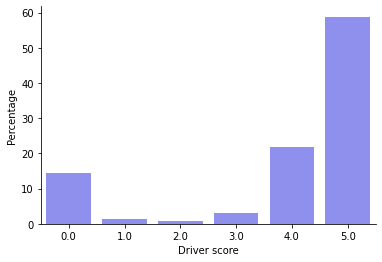

In [66]:
# Нужно исправить первую строчку, чтобы получить верный результат
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Ответ:
```
1
```

# Задание 12
___
Проделайте аналогичные шаги для `rider_score` (оценок клиентов водителями), не забыв построить график. \
В чем его отличие от распределения оценок водителей?

Нужно выбрать подходящие варианты:
+ Водители ставят меньше 0, чем клиенты
+ Более 20% оценок составляют 4
+ Водители ставят больше 0, чем клиенты
+ Более чем в 80% случаев водители поставили клиентам 5 звездочек

In [53]:
rider_score_counts = taxi.rider_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
    .sort_values('rider_score')

In [54]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


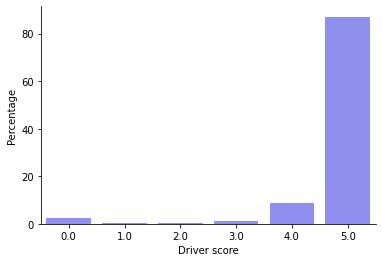

In [55]:
# Строим график и сравнивам два результата
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Ответ:

+ Водители ставят меньше 0, чем клиенты
+ Более чем в 80% случаев водители поставили клиентам 5 звездочек